In [6]:
import datetime
import matplotlib.pyplot as plt

from sunpy.net import Fido, attrs as a
from sunpy.timeseries import TimeSeries

In [7]:
tr = a.Time("2011-02-13 00:00:00.000", "2011-02-16 00:00:00.000")
result = Fido.search(tr,
                      a.hek.FL,
                      a.hek.FL.GOESCls > "M1.0",
                      a.hek.OBS.Observatory == "GOES")

In [8]:
results = result["hek"]["event_starttime", "event_peaktime",
                             "event_endtime", "fl_goescls", "ar_noaanum"]
results

event_starttime,event_peaktime,event_endtime,fl_goescls,ar_noaanum
Time,Time,Time,str4,int64
2011-02-13 17:28:00.000,2011-02-13 17:38:00.000,2011-02-13 17:47:00.000,M6.6,11158
2011-02-14 17:20:00.000,2011-02-14 17:26:00.000,2011-02-14 17:32:00.000,M2.2,11158
2011-02-15 01:44:00.000,2011-02-15 01:56:00.000,2011-02-15 02:06:00.000,X2.2,11158


In [9]:
flare_results = Fido.search(tr, 
                            a.Instrument.xrs 
                            & a.goes.SatelliteNumber(15) 
                            & a.Resolution("avg1m") 
                            | a.hek.FL 
                            & (a.hek.FRM.Name == 'SWPC'))

In [14]:
flare_results[0].path_format_keys()

{'end_time',
 'instrument',
 'physobs',
 'provider',
 'resolution',
 'satellitenumber',
 'source',
 'start_time',
 'url'}

In [10]:
hek_results = flare_results["hek"]["event_starttime", "event_peaktime",
                               "event_endtime", "fl_goescls", "ar_noaanum"]
hek_results = hek_results[hek_results["fl_goescls"] > "M1.0"]
hek_results

event_starttime,event_peaktime,event_endtime,fl_goescls,ar_noaanum
Time,Time,Time,str4,int64
2011-02-13 17:28:00.000,2011-02-13 17:38:00.000,2011-02-13 17:47:00.000,M6.6,11158
2011-02-14 17:20:00.000,2011-02-14 17:26:00.000,2011-02-14 17:32:00.000,M2.2,11158
2011-02-15 01:44:00.000,2011-02-15 01:56:00.000,2011-02-15 02:06:00.000,X2.2,11158


In [7]:
files = Fido.fetch(flare_results, path="download/11158/{instrument}/{file}")

Files Downloaded:   0%|          | 0/4 [00:00<?, ?file/s]

sci_xrsf-l2-avg1m_g15_d20110215_v1-0-0.nc:   0%|          | 0.00/976k [00:00<?, ?B/s]

sci_xrsf-l2-avg1m_g15_d20110214_v1-0-0.nc:   0%|          | 0.00/976k [00:00<?, ?B/s]

sci_xrsf-l2-avg1m_g15_d20110213_v1-0-0.nc:   0%|          | 0.00/976k [00:00<?, ?B/s]

sci_xrsf-l2-avg1m_g15_d20110216_v1-0-0.nc:   0%|          | 0.00/976k [00:00<?, ?B/s]

In [8]:
goes = TimeSeries(files, concatenate=True)

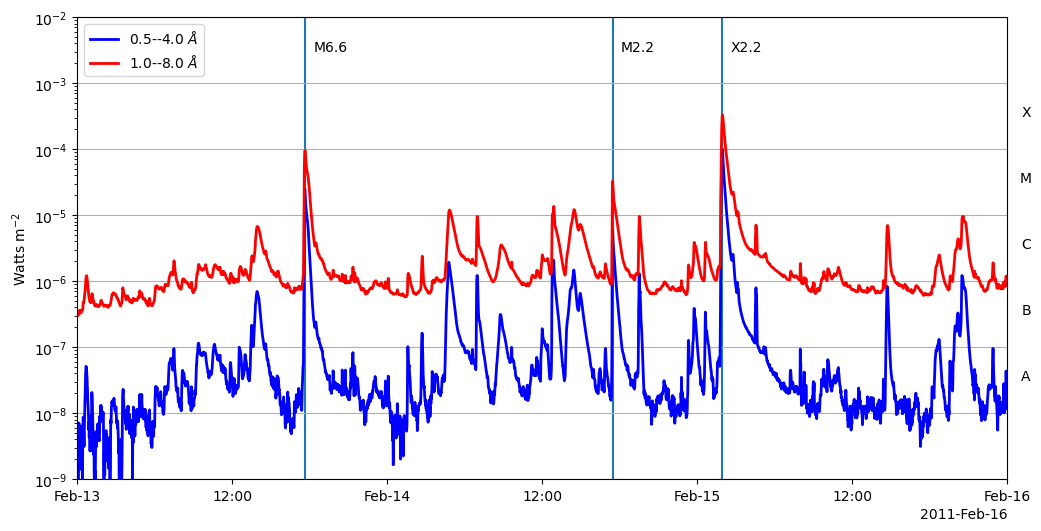

In [9]:
fig, ax = plt.subplots(figsize=(12, 6))
goes.plot(axes=ax)

labeltime = datetime.timedelta(minutes=30)

peaktime = hek_results['event_peaktime'].to_datetime()
starttime = hek_results['event_starttime'].to_datetime()
endtime = hek_results['event_endtime'].to_datetime()
goescls = hek_results['fl_goescls']

for pt, st, et, cl in zip(peaktime, starttime, endtime, goescls):
    ax.axvline(pt, linestyle='-', zorder=0)
    ax.annotate(cl, xy=(et+labeltime, 3e-3))
    ax.legend(loc=2)
    ax.set_yscale('log')
ax.set_xlim(tr.start.to_datetime(), tr.end.to_datetime())
plt.show()

In [10]:
hek_results.to_pandas().to_csv('11158_goes_flare_list.csv', index=False)